# **Lab 3: Implementing a Feed Forward Neural Network in Keras to Do Multi-Class Classification using the Fashion MNIST dataset**

**Date: 06 October 2023**

**Problem Description:** Using Keras build a 4 Layer Feedforward Neural Network model and train it using Fashion MNIST dataset for doing Multi-Class Classification.

Use ADAM optimizer and Sparse Categorical Cross Entropy as the loss function along with ACCURACY as the metric. The hidden layer's should use RELU activation function and the output layer should use SOFTMAX as the activation function.

Evaluate the performance of the model in terms of its accuracy on Test Dataset provided in Fashion MNIST and finally also Visualize the predictions on some sample test data.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fm_dataset = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fm_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("training set shape: ", train_images.shape)
print("training set labels shape: ", train_labels.shape)

print("test set shape: ", test_images.shape)
print("test set labels shape: ", test_labels.shape)

print(" a sample training image label " , train_labels[0])


training set shape:  (60000, 28, 28)
training set labels shape:  (60000,)
test set shape:  (10000, 28, 28)
test set labels shape:  (10000,)
 a sample training image label  9


In [ ]:
# Define text labels for Fashion MNIST categories
fashion_mnist_labels = ["T-shirt/top", # Label 0
                        "Trouser", # Label 1
                        "Pullover", # Label 2
                        "Dress", # Label 3
                        "Coat", # Label 4
                        "Sandal", # Label 5
                        "Shirt", # Label 6
                        "Sneaker", # Label 7
                        "Bag",# Label 8
                        "Ankle boot"] # Label 9


y = 3 Dress


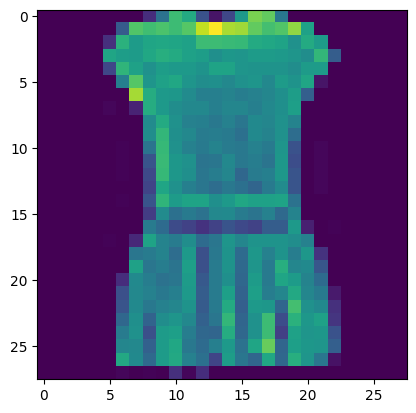

In [ ]:
## Visualize some images from 60,000 images by randomly picking up an image from training set
## We can pick up any number between 0 and 59,999
i = 3 # i can be between 0 to 59,999
# 'train_labels' contain the labels ranging from 0 to 9
label = train_labels[i]
#Print the label, for example 2 pullover
print("y = " + str(label) + " " + (fashion_mnist_labels[label]))
# Show the image for that label
plt.imshow(train_images[i])

In [ ]:
# Step 1 : Defining our ANN
# Total Params = 2,35,500 + 30,100 + 1010 = 2,66,610
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu')) #2,35,500 params
model.add(keras.layers.Dense(100, activation='relu')) # 30,100 params
model.add(keras.layers.Dense(10, activation='softmax')) # 1010 params

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

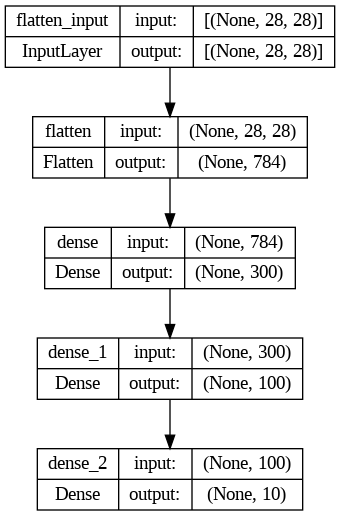

In [ ]:
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [ ]:
# Step 2: Compiling the defined Neural Network Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Step 3: Training the Compiled NN Model Using Back-Propagation Method
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 2.3207 - accuracy: 0.7715
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5065 - accuracy: 0.8265
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4637 - accuracy: 0.8353
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4317 - accuracy: 0.8449
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4135 - accuracy: 0.8525
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3857 - accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3819 - accuracy: 0.8635
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3642 - accuracy: 0.8687
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3564 - accuracy: 0.8719
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [ ]:
# Step 4 : Evaluating the trained model on Test Data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test accuracy
print('\n', 'Test Accuracy: ', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.8417

 Test Accuracy:  0.84170001745224


In [ ]:
result = np.random.choice(test_images.shape[0], size = 15, replace=False)
y_predicted = model.predict(test_images)
fashion_mnist_labels[np.argmax(y_predicted[2300])]

313/313 [==============================] - 1s 2ms/step


'Pullover'

# Visualize the prediction
Now let us visualize the prediction using the model we just trained above. First we will get the predictions with the model from the test data. Then we print 15 sample random images from the test dataset, and set the titles with the prediction and the ground-truth label. If the prediction matches the true label, the title will be green; otherwise the title will be displayed in red.

313/313 [==============================] - 1s 2ms/step


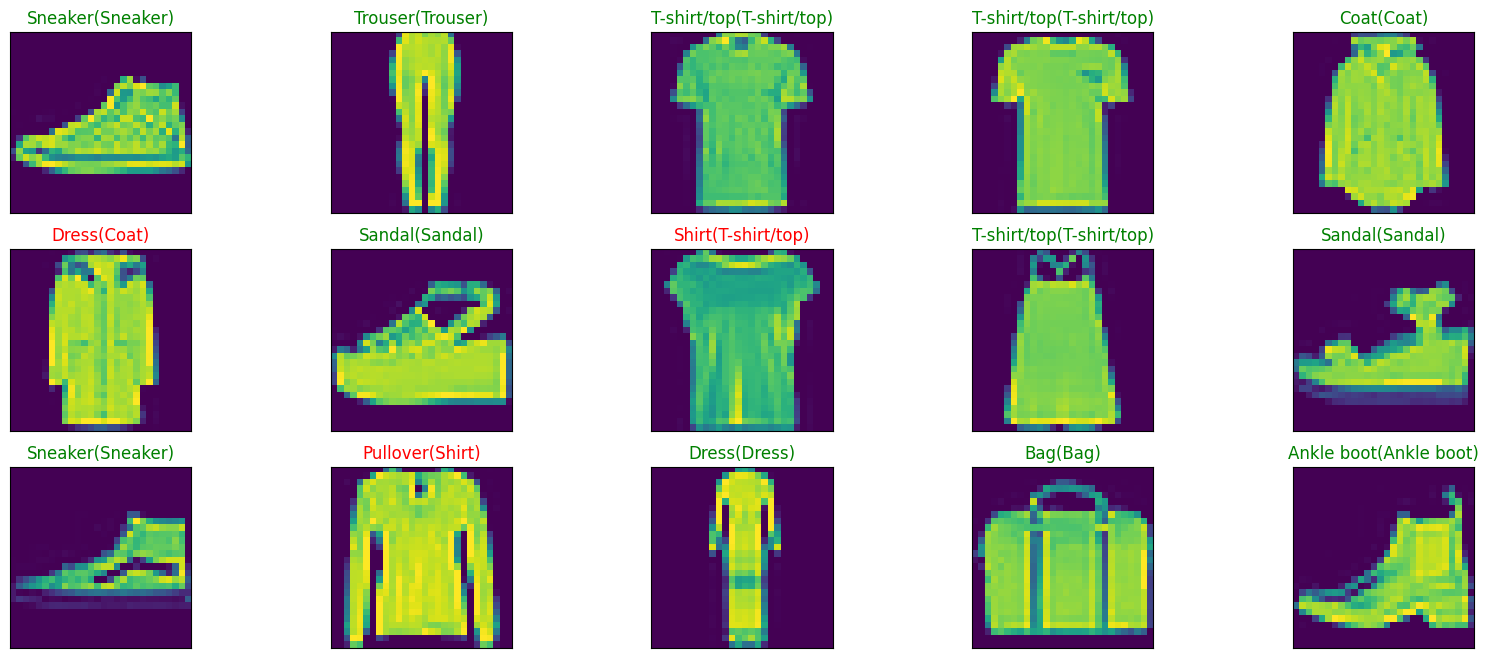

In [ ]:
# Step 5 : Making Actual Predictions (Classification) on Real World Data
y_predicted = model.predict(test_images)

#Plot a random sample of 15 test images, their predicted labels and the ground truth (i.e. actual) label
figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size = 15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_predicted[index])
    #true_index = np.argmax(test_labels[index])
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{}({})".format(fashion_mnist_labels[predict_index],
                                 fashion_mnist_labels[true_index]),
                                 color = "green" if predict_index == true_index else "red")